# Import and Test Model
This is used for blind testing of the model. The trained model is loaded in along with total power measurements. The predictions are then plotted. Since the actual values are not brought in this isnt the best code to use tbh.

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, Flatten
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# List of CSV files to use for testing
csv_files = ['/content/drive/MyDrive/out.csv']  # Add more file names as needed

# Load and concatenate data from multiple CSV files
data_list = []
for csv_file in csv_files:
    data = pd.read_csv(csv_file)
    data_list.append(data)

# Concatenate data from all CSV files
data = pd.concat(data_list, ignore_index=True)

X_test = data[['Main']].values  # Extract 'Main' column as features

# Convert 'timestamp' column to datetime
data.rename(columns={'Timestamp': 'timestamp'}, inplace=True)
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract timestamps as the test timestamps
test_timestamps = data['timestamp']

data['timestamp'] = pd.to_datetime(data['timestamp'])
data['Hour'] = data['timestamp'].dt.hour
data['DayOfWeek'] = data['timestamp'].dt.dayofweek
data['Month'] = data['timestamp'].dt.month

data.rename(columns={'Main': 'Total'}, inplace=True)

#actual_values = data.copy()

In [ ]:
data['Washer'] = 0
data['BlowerGH'] = 0
data['Lights'] = 0
data['HVAC'] = 0
data['Dryer'] = 0
data['Recs'] = 0
data['WaterHeater'] = 0
data['Other'] = 0
data

,Total,timestamp,Hour,DayOfWeek,Month,Washer,BlowerGH,Lights,HVAC,Dryer,Recs,WaterHeater,Other
0,189.5,2024-03-04 00:39:00+00:00,0,0,3,0,0,0,0,0,0,0,0
1,189.4,2024-03-04 00:40:00+00:00,0,0,3,0,0,0,0,0,0,0,0
2,189.4,2024-03-04 00:41:00+00:00,0,0,3,0,0,0,0,0,0,0,0
3,189.4,2024-03-04 00:42:00+00:00,0,0,3,0,0,0,0,0,0,0,0
4,189.0,2024-03-04 00:43:00+00:00,0,0,3,0,0,0,0,0,0,0,0
5,188.1,2024-03-04 00:44:00+00:00,0,0,3,0,0,0,0,0,0,0,0
6,189.2,2024-03-04 00:45:00+00:00,0,0,3,0,0,0,0,0,0,0,0
7,188.5,2024-03-04 00:46:00+00:00,0,0,3,0,0,0,0,0,0,0,0
8,188.5,2024-03-04 00:47:00+00:00,0,0,3,0,0,0,0,0,0,0,0
9,188.5,2024-03-04 00:48:00+00:00,0,0,3,0,0,0,0,0,0,0,0


In [ ]:
#X = data[['Hour', 'DayOfWeek', 'Month', 'Total', 'Temperature']].values
X = data[['Hour', 'DayOfWeek', 'Month', 'Total']].values
y = data[['Washer', 'HVAC', 'Lights', 'Dryer', 'Recs', 'WaterHeater', 'Other']].values

# Function to create sequences
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps + 1):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps - 1])
    return np.array(Xs), np.array(ys)

TIME_STEPS = 10

# Create sequences
X_seq, y_seq = create_dataset(X, y, TIME_STEPS)

X_test, y_test = X_seq, y_seq

In [ ]:
# Load the trained model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/P50_trained_model_simplified.keras')

In [ ]:
# Make predictions
predictions = model.predict(X_test)

1/1 [==============================] - 1s 1s/step


In [ ]:
predictions

array([[4.6993170e+00, 7.3439935e+02, 3.9320667e+01, 8.0061629e-03,
        4.3577984e+01, 2.4588991e+01, 7.2447028e+02]], dtype=float32)

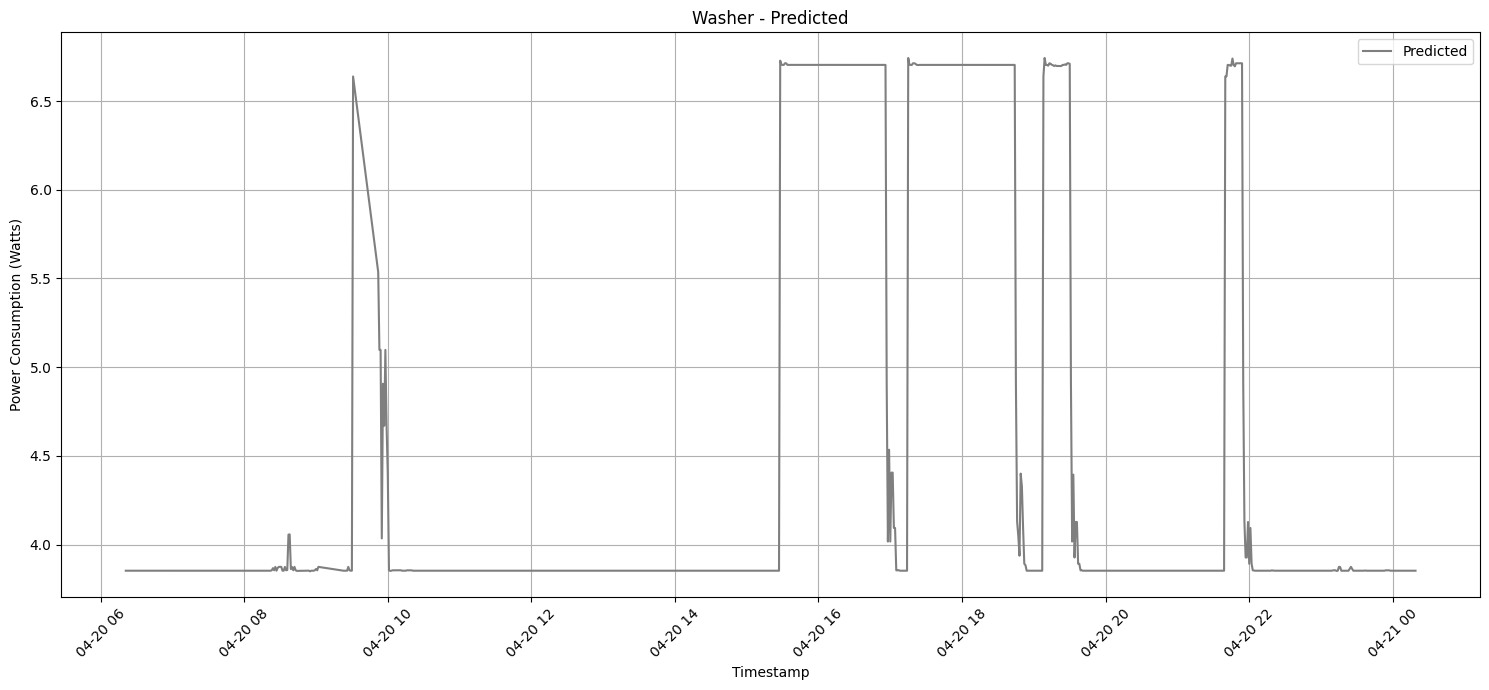

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


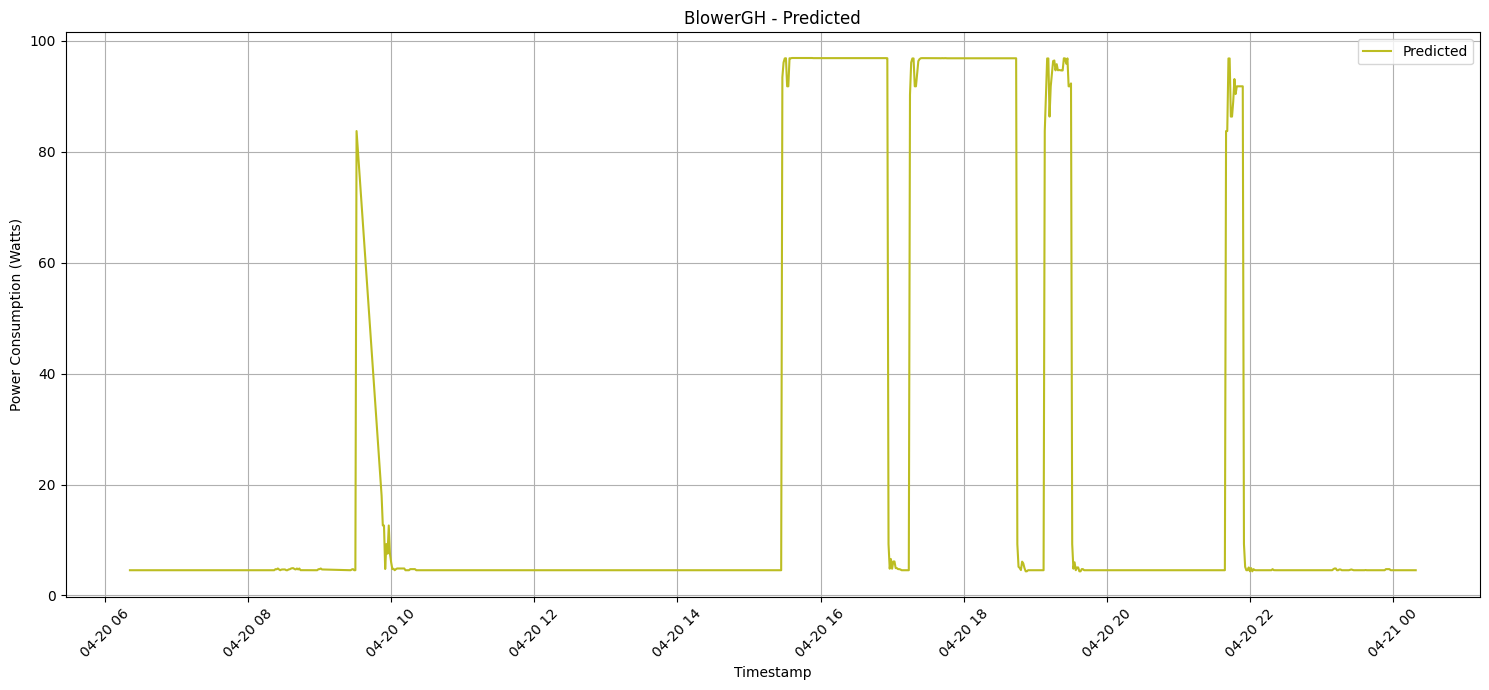

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


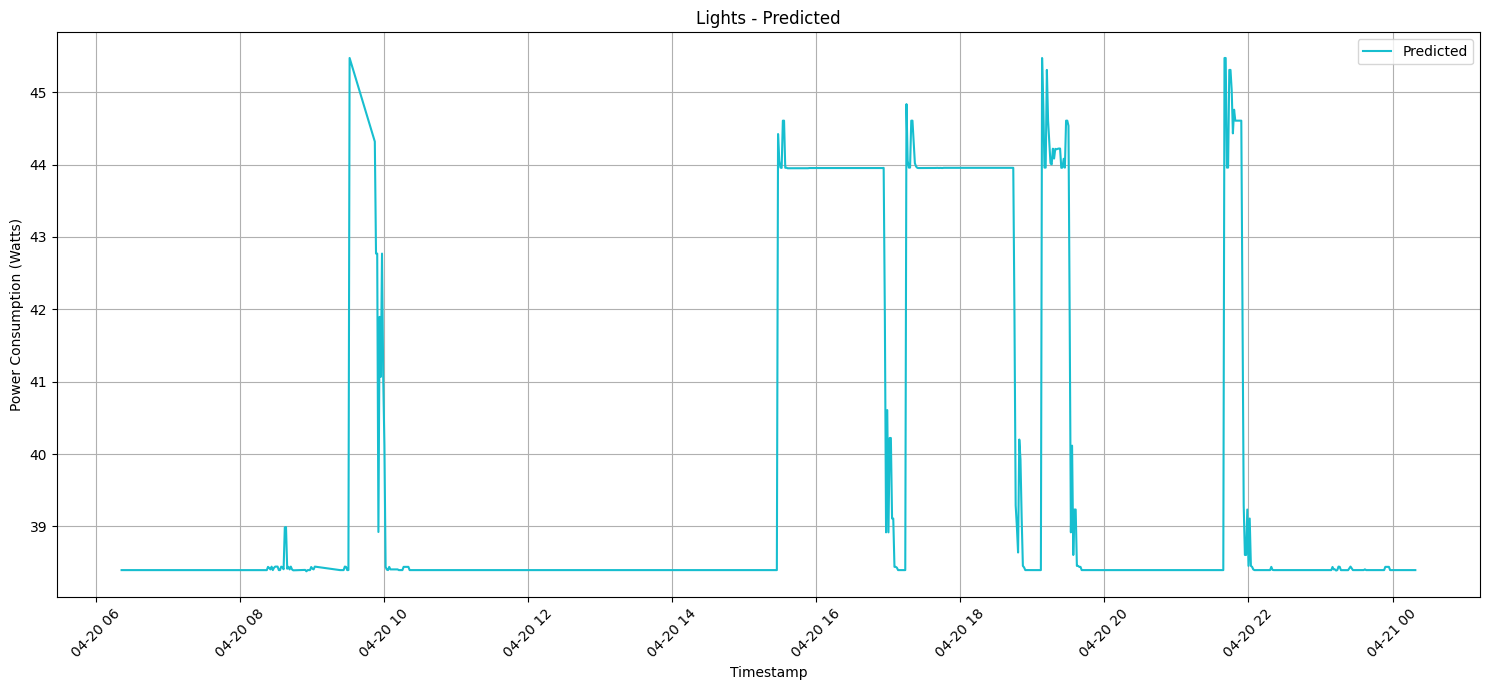

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


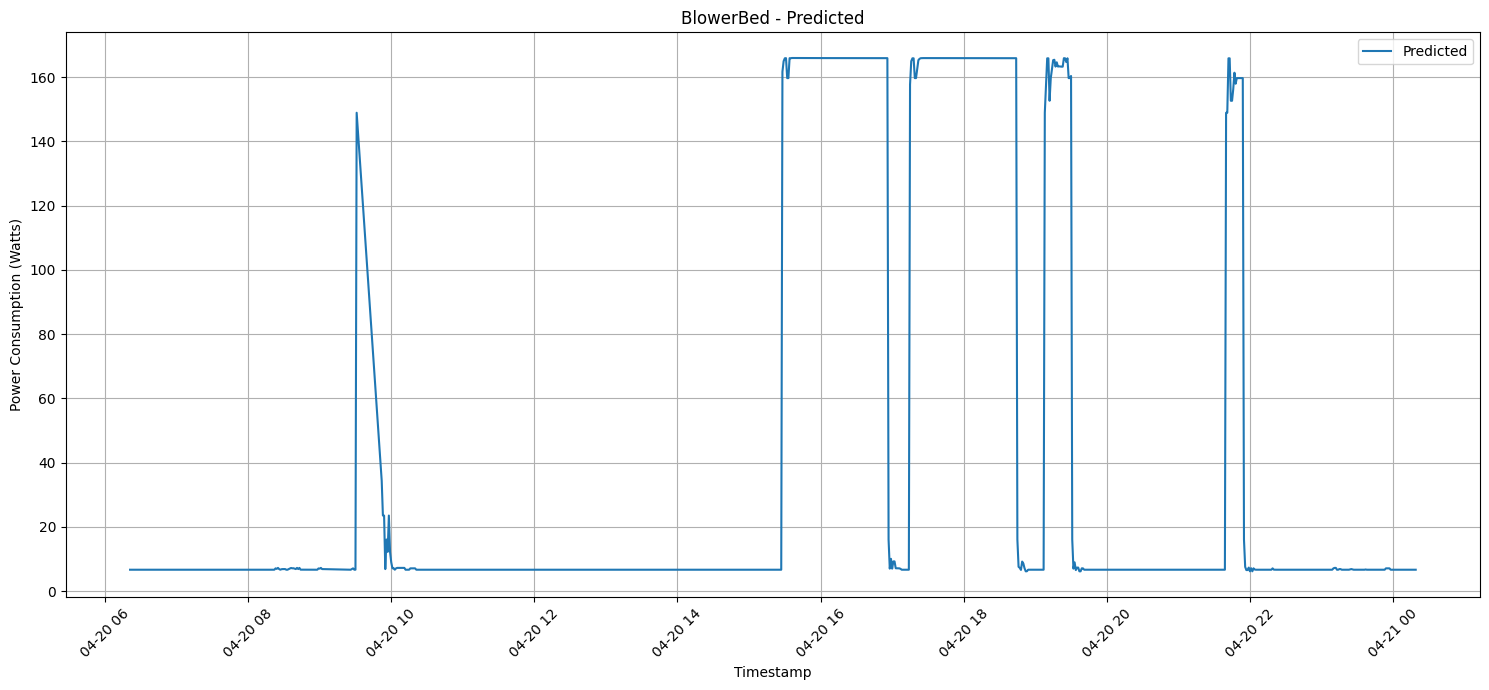

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


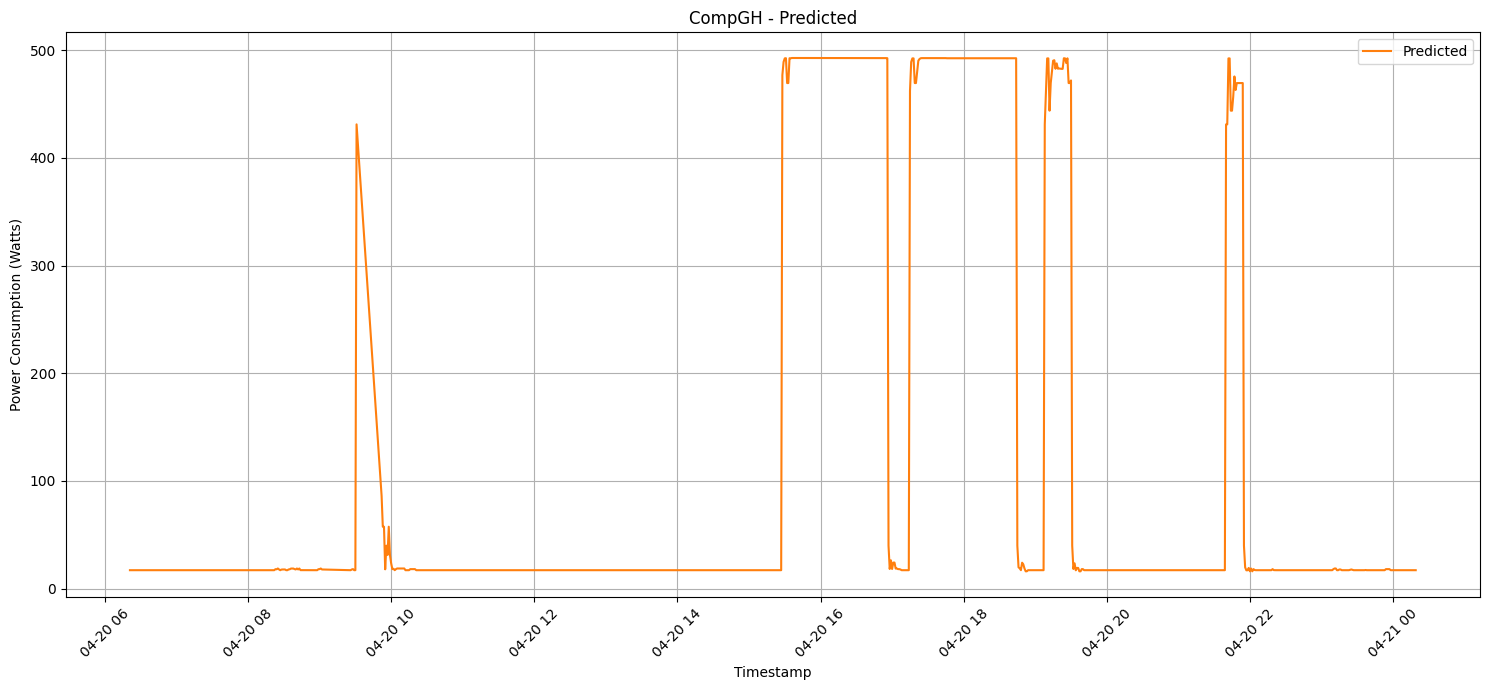

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


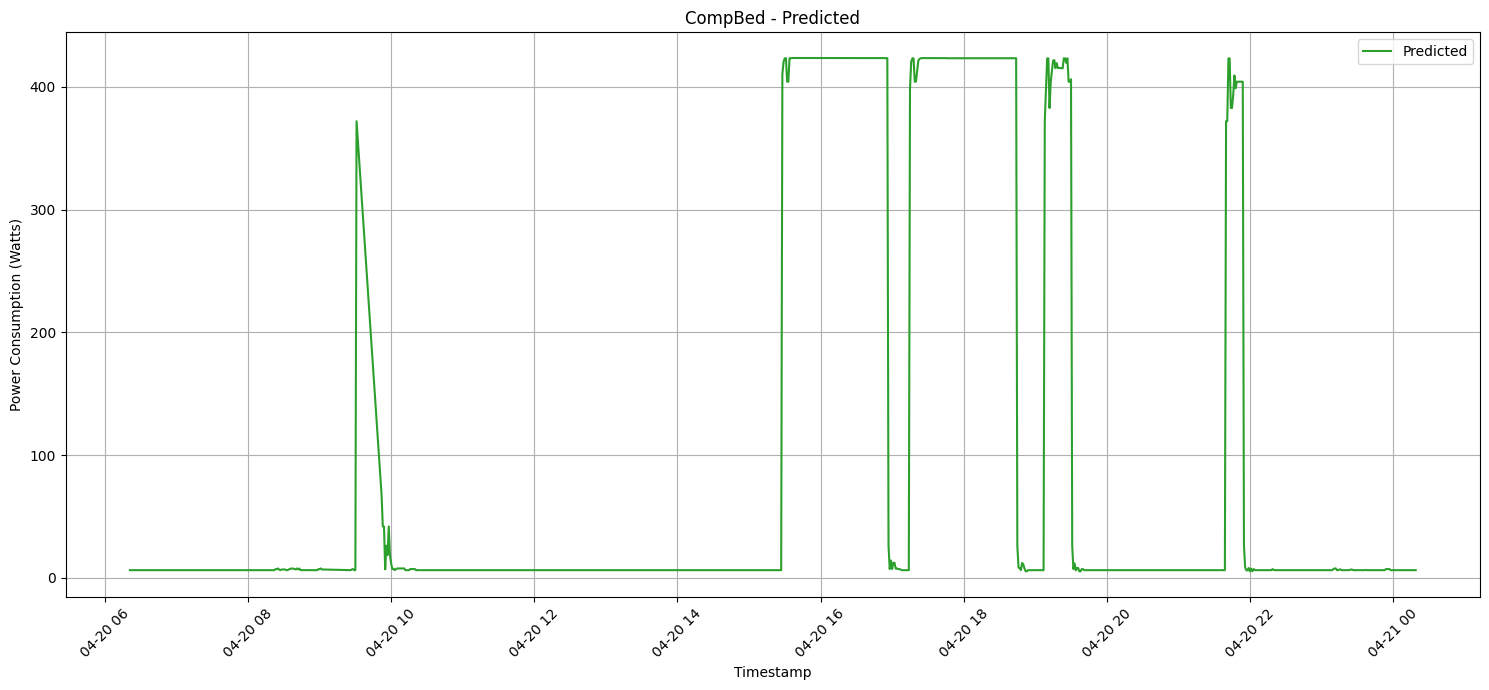

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


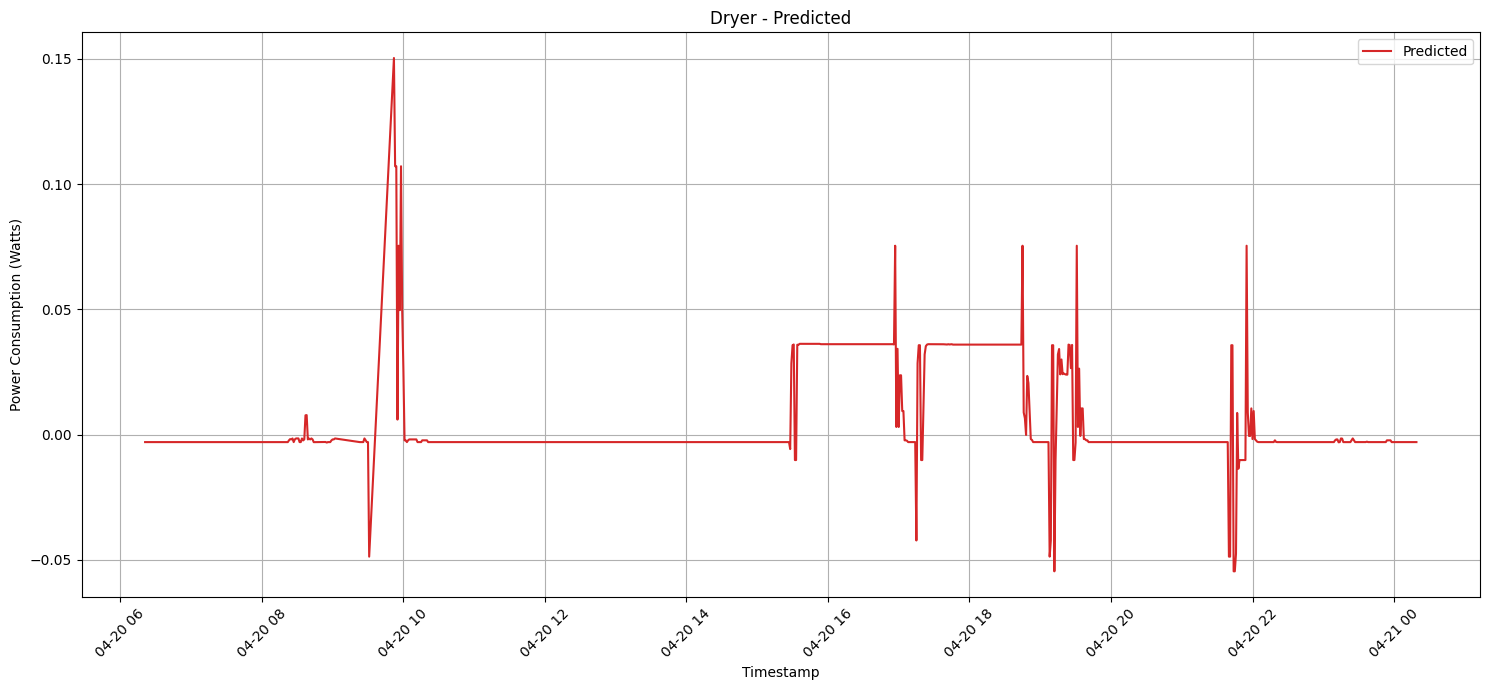

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


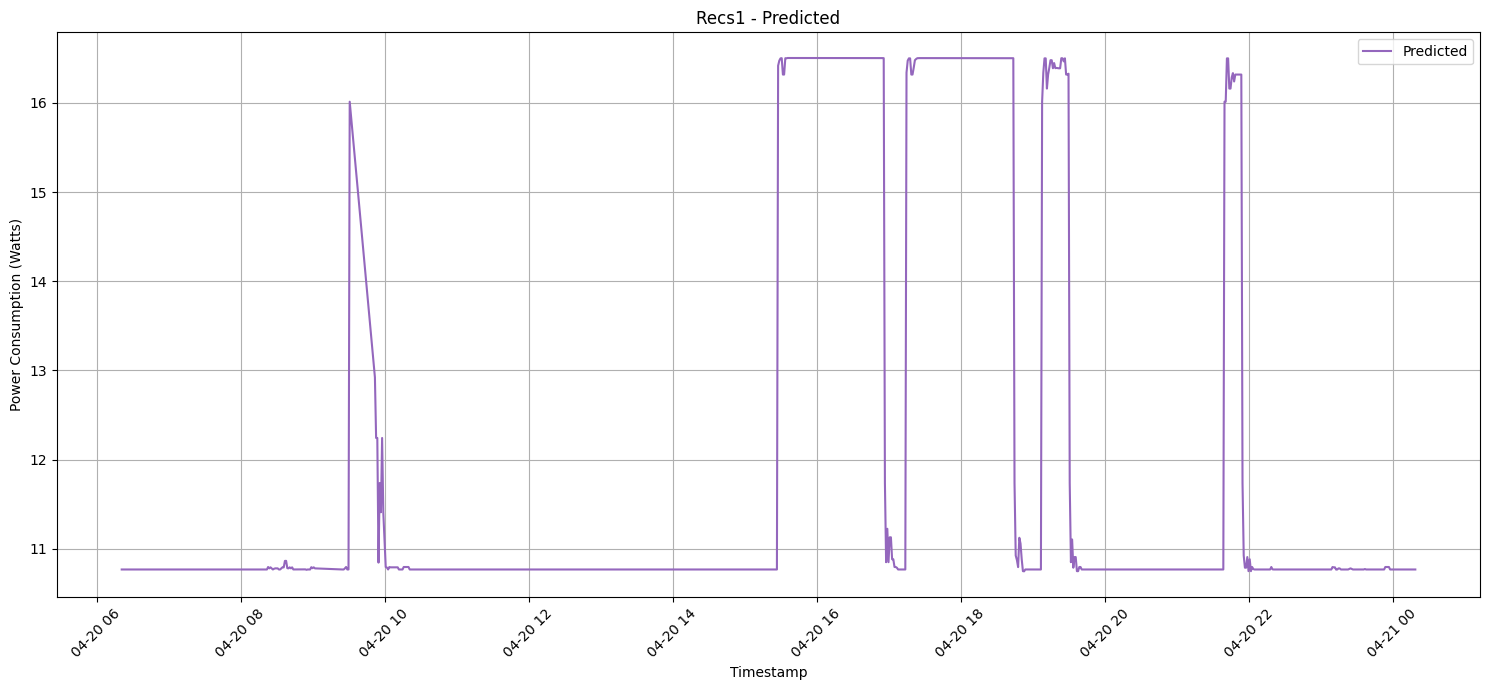

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


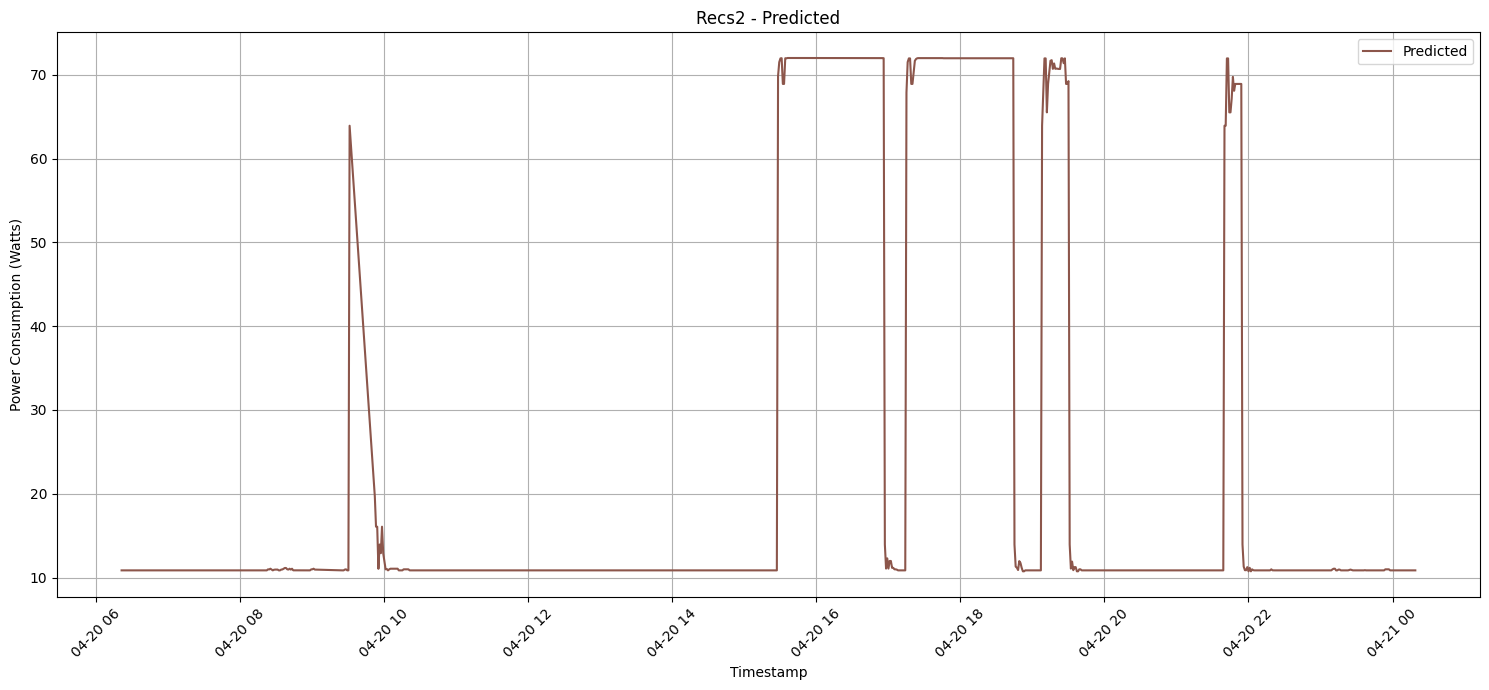

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


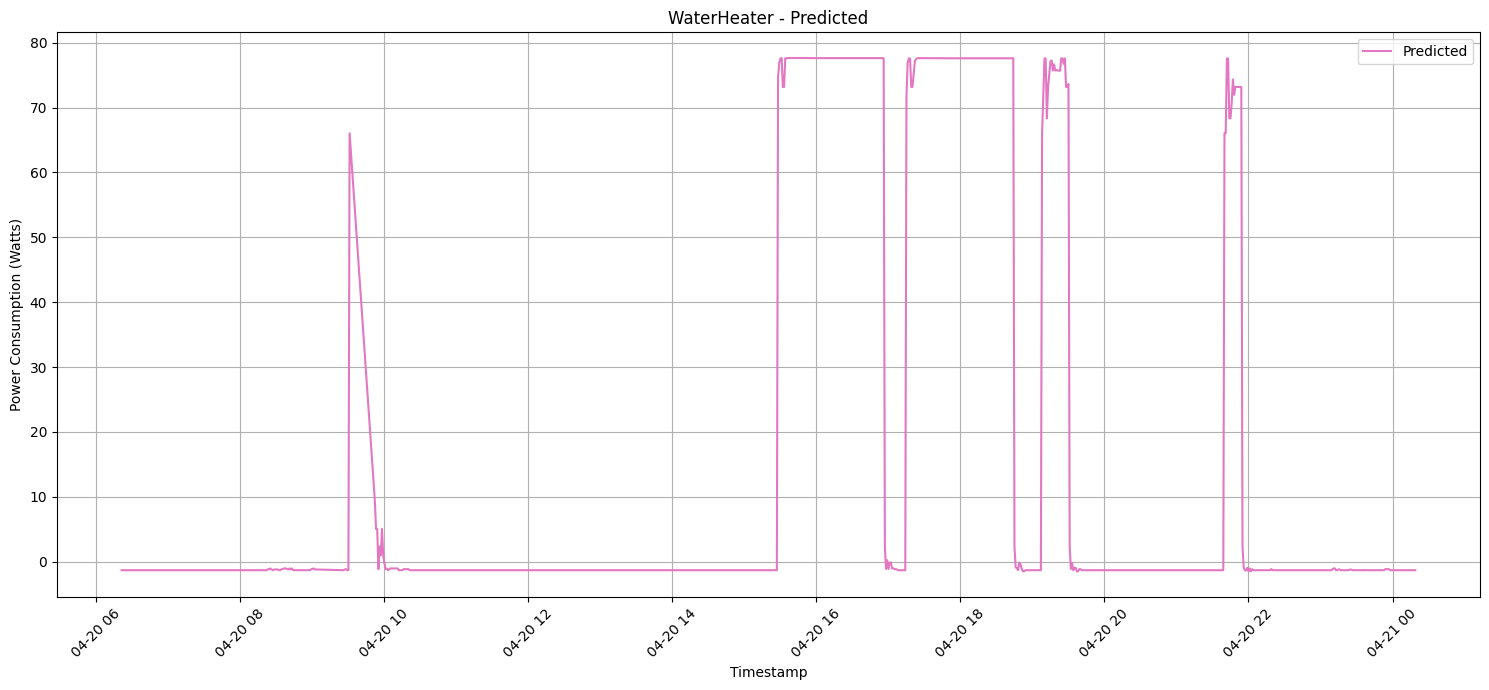

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


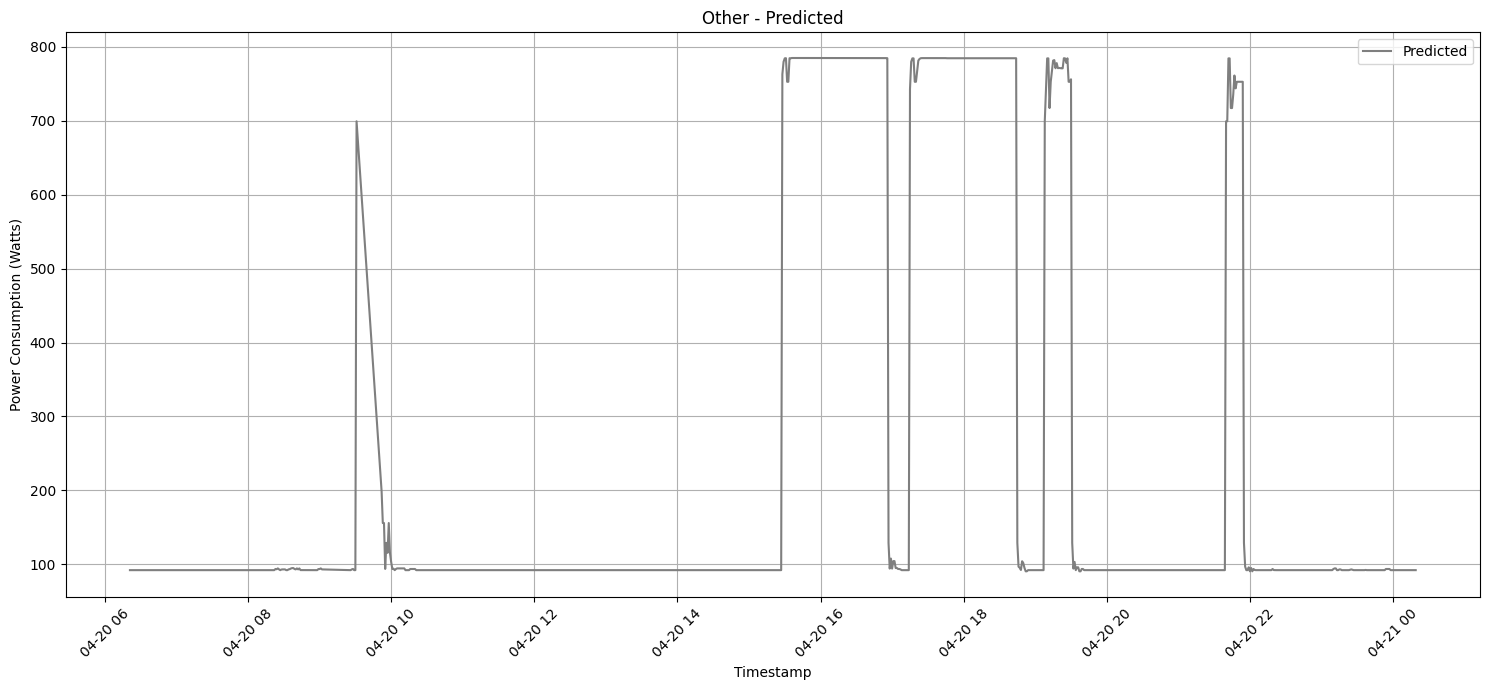

      Appliance Actual Total (Watts)  Predicted Total (Watts)  \
0        Washer                    0              4460.094238   
1      BlowerGH                    0             24515.042969   
2        Lights                    0             39356.937500   
3     BlowerBed                    0             41225.753906   
4        CompGH                    0            120061.953125   
5       CompBed                    0             96734.039062   
6         Dryer                    0                 5.194994   
7         Recs1                    0             11931.854492   
8         Recs2                    0             24022.091797   
9   WaterHeater                    0             15785.186523   
10        Other                    0            241674.625000   

    Percentage Error  
0                inf  
1                inf  
2                inf  
3                inf  
4                inf  
5                inf  
6                inf  
7                inf  
8           

<ipython-input-18-1fabcc0b3ace>:32: RuntimeWarning: divide by zero encountered in scalar divide
  percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)
<ipython-input-18-1fabcc0b3ace>:35: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({'Appliance': appliance,


In [ ]:
predicted_values = predictions
actual_values = y_test

test_timestamps2 = test_timestamps[:-9]  # Drop the last 9 values

# Create a list of appliance names
appliance_names = ['Washer', 'BlowerGH', 'Lights', 'BlowerBed', 'CompGH', 'CompBed', 'Dryer', 'Recs1', 'Recs2', 'WaterHeater', 'Other']

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Appliance', 'Actual Total (Watts)', 'Predicted Total (Watts)', 'Percentage Error'])

for idx, appliance in enumerate(appliance_names):
    # Plot actual versus predicted usage for each appliance
    plt.figure(figsize=(15, 7))
    #plt.plot(test_timestamps2, actual_values[:, idx], label='Actual', color='C'+str(idx))
    plt.plot(test_timestamps2, predicted_values[:, idx], label='Predicted', color='C'+str(idx+7))
    #plt.title(f"{appliance} - Actual vs Predicted")
    plt.title(f"{appliance} - Predicted")
    plt.xlabel('Timestamp')
    plt.ylabel('Power Consumption (Watts)')
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Calculate actual and predicted total power in watts for the current appliance
    actual_total = actual_values[:, idx].sum()
    predicted_total = predicted_values[:, idx].sum()

    # Calculate the percentage error for the current appliance
    percentage_error = abs(((actual_total - predicted_total) / actual_total) * 100)

    # Append the results to the DataFrame
    results_df = results_df.append({'Appliance': appliance,
                                    'Actual Total (Watts)': actual_total,
                                    'Predicted Total (Watts)': predicted_total,
                                    'Percentage Error': percentage_error},
                                   ignore_index=True)

# Display the results DataFrame
print(results_df)